In [2]:
import pandas as pd

import sys
sys.path.append("..")

import cvmpy

In [3]:
fi = cvmpy.FI()

For static data, use fetch_static_data() method:

In [4]:
fi.fetch_static_data("cadastro")

Fetching data from: https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv
Done.


In [5]:
fi.cadastro.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For historical data, use fetch_historical_data:

In [6]:
fi.fetch_historical_data("informe_diario", "2024-11-15", "2025-01-15")

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202411.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202412.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202501.zip
Done.


In [7]:
fi.informe_diario.inf_diario_fi.head()

,TP_FUNDO_CLASSE,CNPJ_FUNDO_CLASSE,ID_SUBCLASSE,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,NaN,2024-11-01,1.135423e+06,36.728594,1.142933e+06,0.0,0.00,1
1,FI,00.068.305/0001-35,NaN,2024-11-01,3.804175e+07,38.191427,3.803011e+07,0.0,2321.96,5848
2,FI,00.071.477/0001-68,NaN,2024-11-01,1.227486e+09,13.557117,1.227391e+09,19225.7,13141839.89,38270
3,FI,00.073.041/0001-08,NaN,2024-11-01,9.467490e+06,40.302407,9.460943e+06,0.0,0.00,768
4,FI,00.083.181/0001-67,NaN,2024-11-01,2.133746e+10,1033.219024,2.134684e+10,0.0,0.00,4


Supported datasets:

In [8]:
fi.datasets

['cadastro',
 'extrato',
 'informe_diario',
 'composicao_diversificacao',
 'balancete',
 'perfil_mensal',
 'registro_fundo_classe']

For long history, there could be issues regarding memory usage. In those cases, we may want to filter some data. This can be done by informing a parse function to the reader.

In [9]:
list_cnpjs = [
    "37.916.879/0001-26",  # DYNAMO COUGAR MASTER FIA
    "11.188.572/0001-62",  # ATMOS MASTER FIA
    "06.964.937/0001-63",  # OPPORTUNITY SELECTION MASTER FIA
]

fi.fetch_historical_data(
    "composicao_diversificacao",
    "2024-01-31",
    "2024-01-31",
    parser=lambda df: (
        df[df["CNPJ_FUNDO_CLASSE"].isin(list_cnpjs)]
        if "CNPJ_FUNDO_CLASSE" in df.columns
        else df
    ),
)

https://dados.cvm.gov.br/dados/FI/DOC/CDA/DADOS/cda_fi_202401.zip
Done.


An instance of the dataset will be an attribute of FI.

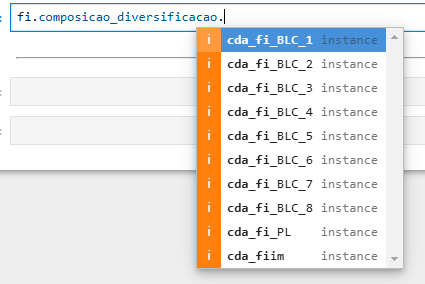

Regarding fund composition, CVM websites shows the following:

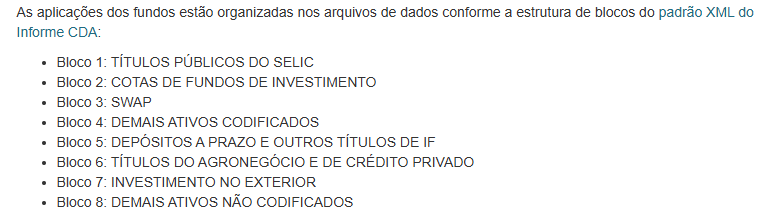

In [222]:
fi.composicao_diversificacao.cda_fi_BLC_4.head()

,TP_FUNDO_CLASSE,CNPJ_FUNDO_CLASSE,DENOM_SOCIAL,DT_COMPTC,TP_APLIC,TP_ATIVO,EMISSOR_LIGADO,TP_NEGOC,QT_VENDA_NEGOC,VL_VENDA_NEGOC,...,VL_AQUIS_NEGOC,QT_POS_FINAL,VL_MERC_POS_FINAL,VL_CUSTO_POS_FINAL,DT_CONFID_APLIC,CD_ATIVO,DS_ATIVO,CD_ISIN,DT_INI_VIGENCIA,DT_FIM_VIGENCIA
0,FI,06.964.937/0001-63,OPPORTUNITY SELECTION MASTER FUNDO DE INVESTIM...,2024-01-31,Ações,Ação ordinária,N,Para negociação,0.0,0.0,...,0.0,290265.0,14983479.30,NaN,2024-07-29,SUZB3,SUZANO S.A. ON NM,BRSUZBACNOR0,2004-08-05,NaN
1,FI,06.964.937/0001-63,OPPORTUNITY SELECTION MASTER FUNDO DE INVESTIM...,2024-01-31,Ações,Ação ordinária,N,Para negociação,0.0,0.0,...,0.0,1187890.0,9408088.80,NaN,2024-07-29,SOMA3,GRUPO SOMA ON NM,BRSOMAACNOR3,2020-07-31,2024-07-31
2,FI,06.964.937/0001-63,OPPORTUNITY SELECTION MASTER FUNDO DE INVESTIM...,2024-01-31,Ações,Ação ordinária,N,Para negociação,0.0,0.0,...,0.0,60318.0,1462711.50,NaN,2024-07-29,SMFT3,SMART FIT ON NM,BRSMFTACNOR1,2018-02-26,NaN
3,FI,06.964.937/0001-63,OPPORTUNITY SELECTION MASTER FUNDO DE INVESTIM...,2024-01-31,Ações,Ação ordinária,N,Para negociação,0.0,0.0,...,0.0,96933.0,5246013.96,NaN,2024-07-29,RENT3,LOCALIZA ON EJ NM,BRRENTACNOR4,2005-05-23,NaN
4,FI,06.964.937/0001-63,OPPORTUNITY SELECTION MASTER FUNDO DE INVESTIM...,2024-01-31,Ações,Ação ordinária,N,Para negociação,0.0,0.0,...,0.0,523338.0,22990238.34,NaN,2024-07-29,PRIO3,PETRORIO ON NM,BRPRIOACNOR1,2015-06-26,NaN
